# Geração Interativa da curva de Interpolação Cúbica

In [1]:
%matplotlib nbagg

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_curva(pontos_controle):
    x, y = list(zip(*pontos_controle))
    
    polinomio = np.polyfit(x, y, len(x)-1)
    funcao = np.poly1d(polinomio)
    print(funcao)
    
    curva_x = np.linspace(x[0], x[-1], 50)
    curva_y = funcao(curva_x)
    
    plt.plot(x, y, 'bo-', curva_x, curva_y, 'r')

In [4]:
def callback(evento): #seleciona pontos de controle clicando com o botão esquerdo do mouse
   
    global  lista_pontos
    if evento.button==1 and evento.inaxes:
        x, y = evento.xdata, evento.ydata
      
        lista_pontos.append((x,y))  
        plt.plot(x, y, 'bo') 
       
    elif evento.button==3:  #plota as linhas e a curva ao clicar com o botão direito do mouse
        plot_curva(lista_pontos)
        
        plt.draw()     
    
    else: pass

In [5]:
def eixos(): #plota o grid da figura
    
    figura = plt.figure(figsize=(6, 5))
    eixo = figura.add_subplot(111)

    eixo.set_xlim([0, 1])
    eixo.set_ylim([0, 1])
    eixo.grid('on')   
    eixo.set_autoscale_on(False)
    figura.canvas.mpl_connect('button_press_event', callback)

<IPython.core.display.Javascript object>


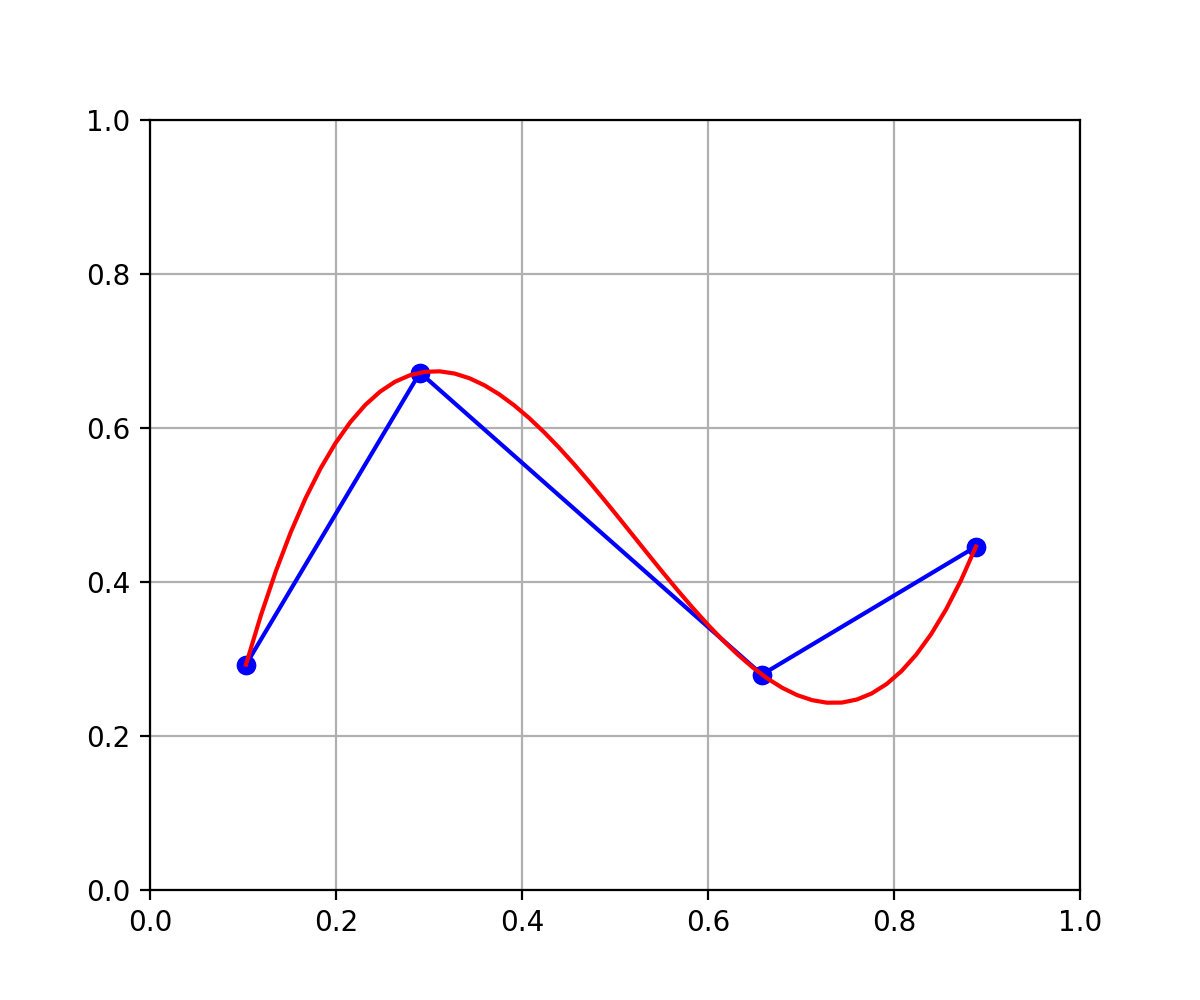

In [6]:
lista_pontos = []
eixos()